In [120]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import mplcyberpunk as mplnk
import seaborn as sns
import plotly.express as px
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf
import joblib

In [2]:
df = pd.read_csv('../data/processed/median_price_all_homes.csv', index_col=0)

In [3]:
df.tail()

,RegionName,State,Metro,CountyName,timestamp,median_price
203875,Hillsboro Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,2019-12,3395.0
203876,Amagansett,NY,New York-Newark-Jersey City,Suffolk County,2019-12,35000.0
203877,Quogue,NY,New York-Newark-Jersey City,Suffolk County,2019-12,31666.0
203878,Ogden,KS,Manhattan,Riley County,2019-12,909.0
203879,Wainscott,NY,New York-Newark-Jersey City,Suffolk County,2019-12,28333.0


In [4]:
df.shape

(203880, 6)

In [5]:
df.describe()

,median_price
count,109832.000000
mean,1693.666181
std,1430.900602
min,500.000000
25%,1200.000000
50%,1500.000000
75%,1900.000000
max,50000.000000


In [6]:
df.isnull().sum()

RegionName          0
State               0
Metro             120
CountyName          0
timestamp           0
median_price    94048
dtype: int64

In [7]:
df.rename(columns={
    'RegionName': 'region',
    'State':'state', 
    'Metro': 'metro',
    'CountyName': 'county'
    }, inplace=True)

In [8]:
df.tail()

,region,state,metro,county,timestamp,median_price
203875,Hillsboro Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,2019-12,3395.0
203876,Amagansett,NY,New York-Newark-Jersey City,Suffolk County,2019-12,35000.0
203877,Quogue,NY,New York-Newark-Jersey City,Suffolk County,2019-12,31666.0
203878,Ogden,KS,Manhattan,Riley County,2019-12,909.0
203879,Wainscott,NY,New York-Newark-Jersey City,Suffolk County,2019-12,28333.0


In [9]:
df.dtypes

region           object
state            object
metro            object
county           object
timestamp        object
median_price    float64
dtype: object

In [10]:
df = df.astype({
    'region': str,
    'state': str,
    'metro': str,
    'county': str,
    'timestamp': 'datetime64[ns]'
})

In [11]:
df['timestamp'].head()

0   2010-01-01
1   2010-01-01
2   2010-01-01
3   2010-01-01
4   2010-01-01
Name: timestamp, dtype: datetime64[ns]

In [12]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

In [14]:
df.tail()

,region,state,metro,county,timestamp,median_price,year,month
203875,Hillsboro Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,2019-12-01,3395.0,2019,12
203876,Amagansett,NY,New York-Newark-Jersey City,Suffolk County,2019-12-01,35000.0,2019,12
203877,Quogue,NY,New York-Newark-Jersey City,Suffolk County,2019-12-01,31666.0,2019,12
203878,Ogden,KS,Manhattan,Riley County,2019-12-01,909.0,2019,12
203879,Wainscott,NY,New York-Newark-Jersey City,Suffolk County,2019-12-01,28333.0,2019,12


In [15]:
df = df[['region', 'state', 'metro', 'county', 'year', 'month', 'timestamp', 'median_price']]

In [16]:
df.tail()

,region,state,metro,county,year,month,timestamp,median_price
203875,Hillsboro Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,2019,12,2019-12-01,3395.0
203876,Amagansett,NY,New York-Newark-Jersey City,Suffolk County,2019,12,2019-12-01,35000.0
203877,Quogue,NY,New York-Newark-Jersey City,Suffolk County,2019,12,2019-12-01,31666.0
203878,Ogden,KS,Manhattan,Riley County,2019,12,2019-12-01,909.0
203879,Wainscott,NY,New York-Newark-Jersey City,Suffolk County,2019,12,2019-12-01,28333.0


In [17]:
df = df.astype({
    'year': int,
    'month': int
})

In [18]:
df.nunique()

region          1549
state             50
metro            343
county           492
year              10
month             12
timestamp        120
median_price    2716
dtype: int64

In [19]:
len(set(df['region'].unique()).intersection(df['metro'].unique()))

200

Find the region-state-metro-county combination that has the highest number of non-null median prices against timestamps.

In [20]:
price_counts = df.groupby(['region', 'state', 'metro', 'county'])['median_price'].count()
max_combination = price_counts.idxmax()
max_combination

('Port Saint Lucie', 'FL', 'Port St. Lucie', 'Saint Lucie County')

Plot the obtained RSMC combination's against timestamps

In [21]:
max_df = df[
    (df['region'] == max_combination[0]) &
    (df['state'] == max_combination[1]) &
    (df['metro'] == max_combination[2] )&
    (df['county'] == max_combination[3])
]

In [24]:
fig = px.line(max_df, x='timestamp', y='median_price', title='Median Price Over Time',
              labels={'timestamp': 'Timestamp', 'median_price': 'Median Price'},
              template='plotly_dark')
fig.update_layout(width=1000, height=500)
fig.show()

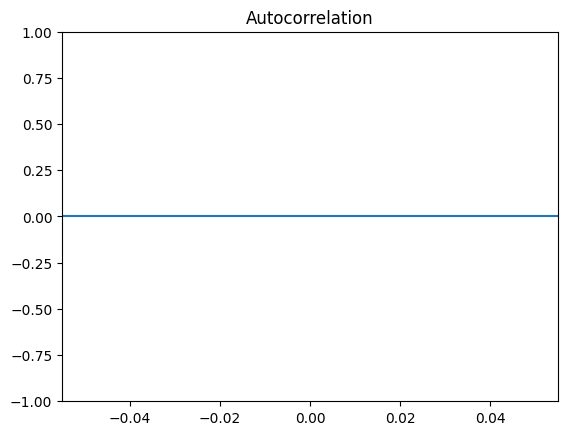

In [35]:
plot_acf(df['median_price'], lags=50)
plt.show()

In [ ]:
class Exputer(BaseEstimator, TransformerMixin):
    
    def __init__(self, include=True):
        super(Exputer, self).__init__()
        self.include = include
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        combined_data = np.column_stack((X, y))
        null_rows = np.isnan(combined_data).any(axis=1)

In [36]:
df.dropna(inplace=True)

In [38]:
df.shape

(109832, 8)

In [41]:
df.head()

,region,state,metro,county,year,month,timestamp,median_price
148,Port Saint Lucie,FL,Port St. Lucie,Saint Lucie County,2010,1,2010-01-01,895.0
1702,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2010,2,2010-02-01,1600.0
1704,Philadelphia,PA,Philadelphia-Camden-Wilmington,Philadelphia County,2010,2,2010-02-01,1350.0
1705,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,2010,2,2010-02-01,1300.0
1706,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark County,2010,2,2010-02-01,1295.0


In [44]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:6]].values, df['median_price'].values, random_state=40, test_size=0.2)

In [54]:
transformer = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), [4, 5]),
    ('cat', OneHotEncoder(), [0, 1, 2, 3])
])

In [55]:
pipeline = Pipeline([
    ('transform', transformer),
    ('model', RandomForestRegressor())
])

In [62]:
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  [4, 5]),
                                                 ('cat', OneHotEncoder(),
                                                  [0, 1, 2, 3])])),
                ('model', RandomForestRegressor())])

In [57]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  [4, 5]),
                                                 ('cat', OneHotEncoder(),
                                                  [0, 1, 2, 3])])),
                ('model', RandomForestRegressor())])

In [58]:
y_pred = pipeline.predict(x_test)

In [59]:
pipeline.score(x_test, y_test)

0.9939806297043157

In [64]:
mean_absolute_percentage_error(y_pred=y_pred, y_true=y_test)

0.026835161108985692

In [73]:
cat_columns = [0, 1, 2, 3]
label_encoder = LabelEncoder()

for column in cat_columns:
    x_test[:, column] = label_encoder.fit_transform(x_test[:, column])

In [77]:
pca = PCA(n_components=1)
x_test_decomposed = pca.fit_transform(x_test)

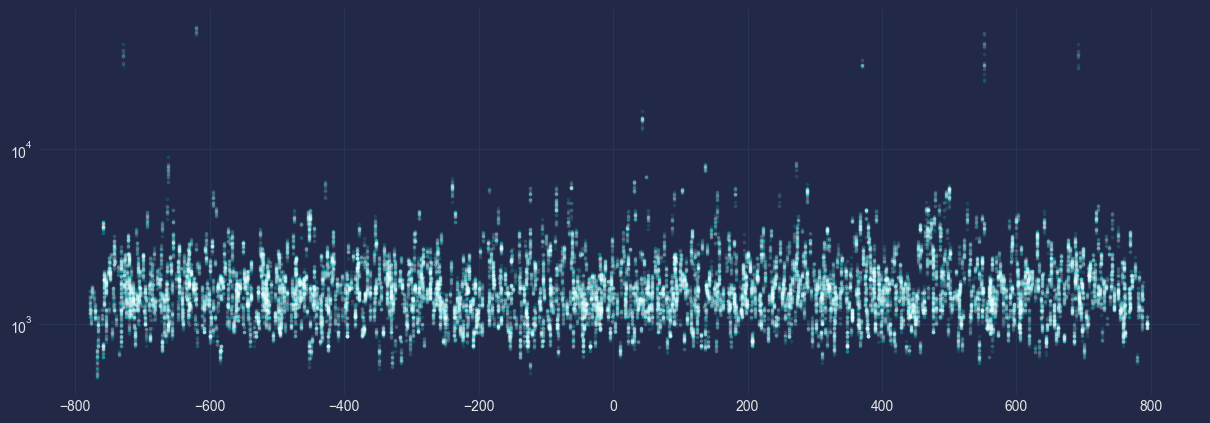

In [117]:
plt.figure(figsize=(15, 5))
plt.scatter(x_test_decomposed, y_test, c='aqua', alpha=0.1, s=3, label='true')
plt.scatter(x_test_decomposed, y_pred, c='white', s=3, alpha=0.1, label='pred')
plt.yscale('log')
plt.show()

In [121]:
joblib.dump(pipeline, '../models/pipeline')

['../models/pipeline']